# PCA

In [63]:
from sklearn.datasets import load_iris
from scipy.linalg import svd
import numpy as np

iris = load_iris().data

n = len(iris)  # 행의 개수
p = len(iris[0]) #열의 개수
print(n, p)

# 센터링
iris_ctr = np.zeros((n, p))  
iris_ctr = iris - np.mean(iris, axis=0)

U, S, V = svd(iris_ctr, full_matrices=False)

# S는 고유값
# U, V는 고유벡터
iris_pca1 = U*S
iris_pca1 = iris_pca1[:, :2]
print(iris_pca1)

150 4
[[-2.68412563 -0.31939725]
 [-2.71414169  0.17700123]
 [-2.88899057  0.14494943]
 [-2.74534286  0.31829898]
 [-2.72871654 -0.32675451]
 [-2.28085963 -0.74133045]
 [-2.82053775  0.08946138]
 [-2.62614497 -0.16338496]
 [-2.88638273  0.57831175]
 [-2.6727558   0.11377425]
 [-2.50694709 -0.6450689 ]
 [-2.61275523 -0.01472994]
 [-2.78610927  0.235112  ]
 [-3.22380374  0.51139459]
 [-2.64475039 -1.17876464]
 [-2.38603903 -1.33806233]
 [-2.62352788 -0.81067951]
 [-2.64829671 -0.31184914]
 [-2.19982032 -0.87283904]
 [-2.5879864  -0.51356031]
 [-2.31025622 -0.39134594]
 [-2.54370523 -0.43299606]
 [-3.21593942 -0.13346807]
 [-2.30273318 -0.09870885]
 [-2.35575405  0.03728186]
 [-2.50666891  0.14601688]
 [-2.46882007 -0.13095149]
 [-2.56231991 -0.36771886]
 [-2.63953472 -0.31203998]
 [-2.63198939  0.19696122]
 [-2.58739848  0.20431849]
 [-2.4099325  -0.41092426]
 [-2.64886233 -0.81336382]
 [-2.59873675 -1.09314576]
 [-2.63692688  0.12132235]
 [-2.86624165 -0.06936447]
 [-2.62523805 -0.59937

In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
iris_pca2 = pca.fit_transform(iris_ctr)
print(pca.fit_transform(iris_ctr)) 

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936447]
 [-2.62523805  0.59937002]
 

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

iris_DF_pca1 = pd.DataFrame(iris_pca1)
iris_DF_pca2 = pd.DataFrame(iris_pca2)

iris_DF_pca1['target'] = load_iris().target
iris_DF_pca2['target'] = load_iris().target

iris_DF_pca1.head()

,0,1,target
0,-2.684126,-0.319397,0
1,-2.714142,0.177001,0
2,-2.888991,0.144949,0
3,-2.745343,0.318299,0
4,-2.728717,-0.326755,0


In [69]:
iris_DF_pca2.head()

,0,1,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


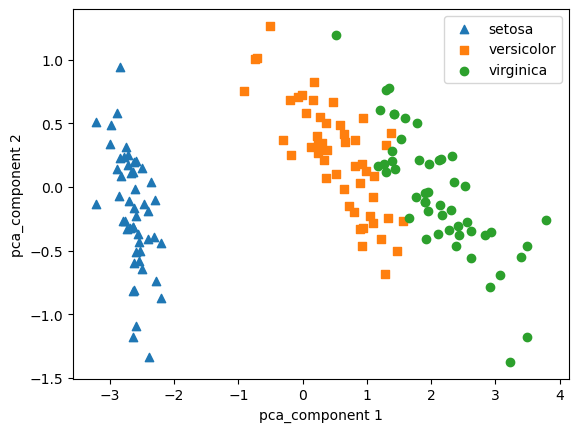

In [70]:
markers= ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = iris_DF_pca1[iris_DF_pca1['target']==i][0]
    y_axis_data = iris_DF_pca1[iris_DF_pca1['target']==i][1]
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=load_iris().target_names[i])

plt.legend()
plt.xlabel('pca_component 1')
plt.ylabel('pca_component 2')
plt.show()

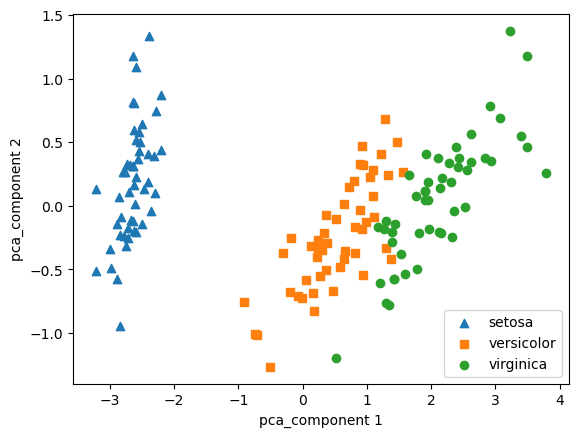

In [71]:
markers= ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = iris_DF_pca2[iris_DF_pca2['target']==i][0]
    y_axis_data = iris_DF_pca2[iris_DF_pca2['target']==i][1]
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=load_iris().target_names[i])

plt.legend()
plt.xlabel('pca_component 1')
plt.ylabel('pca_component 2')
plt.show()

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(random_state=156)
scores1 = cross_val_score(rfc, iris_DF_pca1[[0, 1]], load_iris().target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도: ', scores1)
print('PCA 변환 데이터 평균 정확도: ', np.mean(scores1))

PCA 변환 데이터 교차 검증 개별 정확도:  [0.96 0.98 0.96]
PCA 변환 데이터 평균 정확도:  0.9666666666666667


In [79]:
scores2 = cross_val_score(rfc, iris_DF_pca2[[0, 1]], load_iris().target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도: ', scores2)
print('PCA 변환 데이터 평균 정확도: ', np.mean(scores2))

PCA 변환 데이터 교차 검증 개별 정확도:  [0.94 0.96 0.98]
PCA 변환 데이터 평균 정확도:  0.96


# LDA

In [94]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#  x, y 데이터 생성
x, y = make_classification(n_samples=400, n_features=2, n_informative=1, n_redundant=0, 
                           n_clusters_per_class=1, n_classes=2, random_state=42)

# train, test 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(x, y, random_state=40)

# standardization
scaler = StandardScaler()
scaler.fit(train_input)
train_scaled = scaler.transform(train_input)
test_scaled = scaler.transform(test_input)

lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(train_scaled, train_target)

train_lda = lda.transform(train_scaled)
test_lda = lda.transform(test_input)

# dimension 확인
print(train_lda.shape, test_lda.shape)

(300, 1) (100, 1)


Text(0.5, 1.0, 'test data')

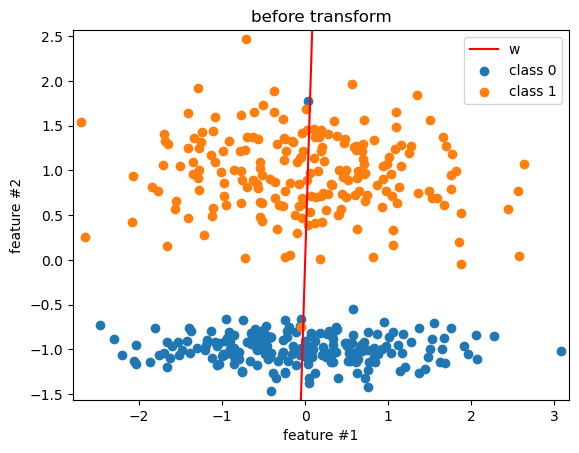

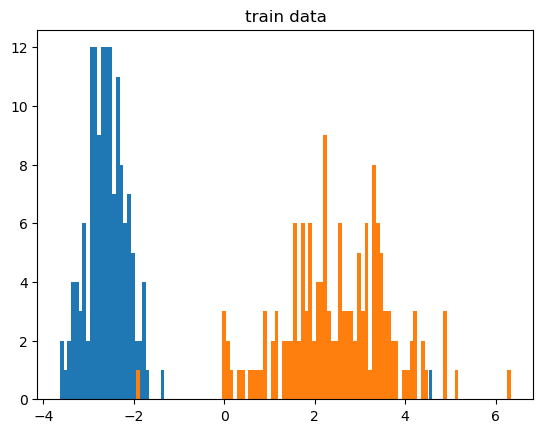

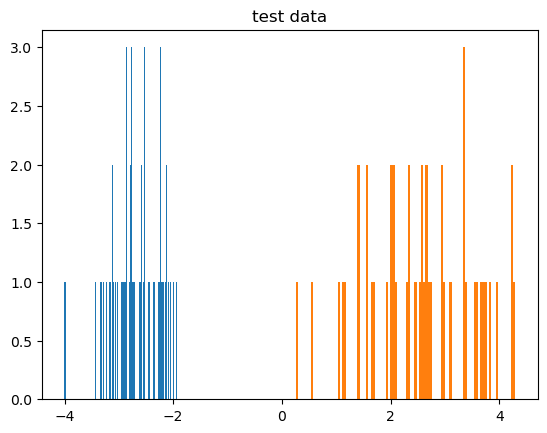

In [95]:
slope = lda.coef_[0,1] / lda.coef_[0,0]
t = np.arange(np.min(x[:,0]), np.max(x[:,0]), 0.1)

label0 = y==0
label1 = y==1
# plt.subplot(1,3,1)
plt.plot(t, slope*t, color='red')
plt.scatter(x[label0,0], x[label0,1])
plt.scatter(x[label1,0], x[label1,1])
plt.xlim(np.min(x[:,0])-0.1, np.max(x[:,0])+0.1)
plt.ylim(np.min(x[:,1])-0.1, np.max(x[:,1])+0.1)
plt.xlabel('feature #1')
plt.ylabel('feature #2')
plt.legend(labels=['w', 'class 0', 'class 1'])
plt.title('before transform')

plt.figure()
plt.hist(train_lda[train_target==0], 100)
plt.hist(train_lda[train_target==1], 100)
plt.title('train data')

plt.figure()
plt.hist(test_lda[test_target==0], 100)
plt.hist(test_lda[test_target==1], 100)
plt.title('test data')

# t-SNE

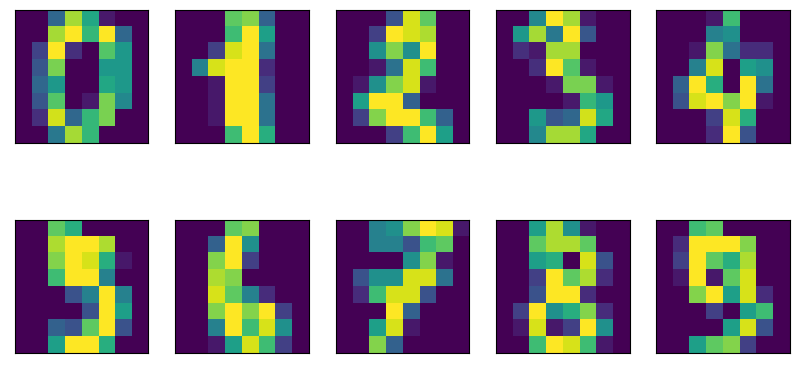

In [98]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

digits = load_digits()

fig, axes = plt.subplots(2,5,figsize=(10,5),
                        subplot_kw = {'xticks':(), 'yticks':()})
for ax, imgs in zip(axes.ravel(), digits.images):
    ax.imshow(imgs)


In [103]:
# 차원 축소: 2차원
n_components = 2
tsne = TSNE(n_components=n_components)

#비교를 위한 PCA, LDA
pca = PCA(n_components=n_components)
lda = LinearDiscriminantAnalysis(solver='svd')

scaler = StandardScaler()
scaler.fit(digits.data)
digits_scaled = scaler.transform(digits.data)


Text(0, 0.5, 'pca_component 2')

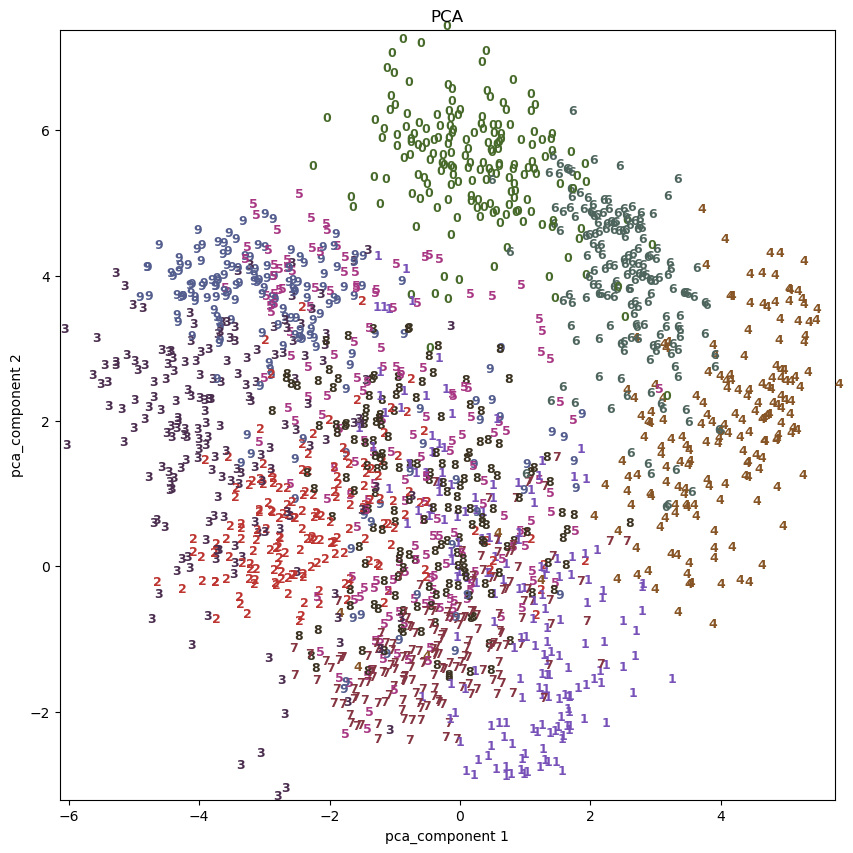

In [107]:
# PCA
pca.fit(digits.data)

digits_pca = pca.transform(digits_scaled)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits_scaled)):
    plt.text(digits_pca[i, 0], digits_pca[i,1], str(digits.target[i]),
            color = colors[digits.target[i]], fontdict={'weight': 'bold', 'size':9})
plt.title("PCA")
plt.xlabel("pca_component 1")
plt.ylabel("pca_component 2")

Text(0.5, 1.0, 'LDA')

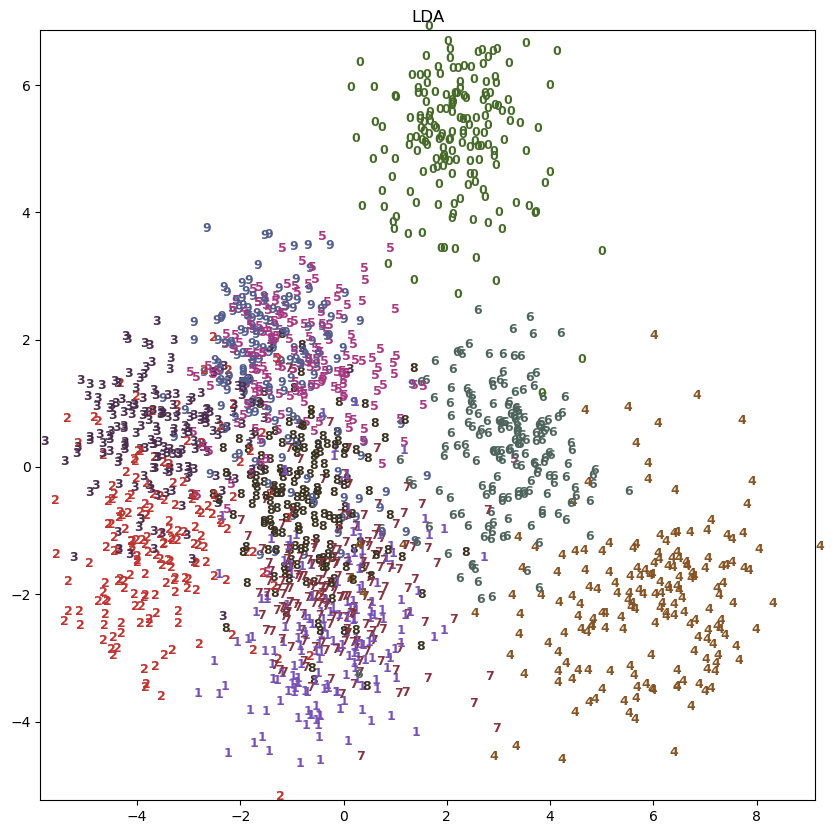

In [108]:
#LDA
lda.fit(digits_scaled, digits.target)
digits_lda = lda.transform(digits_scaled)


plt.figure(figsize=(10,10))
plt.xlim(digits_lda[:, 0].min(), digits_lda[:, 0].max())
plt.ylim(digits_lda[:, 1].min(), digits_lda[:, 1].max())
for i in range(len(digits_scaled)):
    plt.text(digits_lda[i, 0], digits_lda[i,1], str(digits.target[i]),
            color = colors[digits.target[i]], fontdict={'weight': 'bold', 'size':9})
plt.title("LDA")


c:\Users\AY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\AY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 1.0, 't-SNE')

c:\Users\AY\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\AY\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


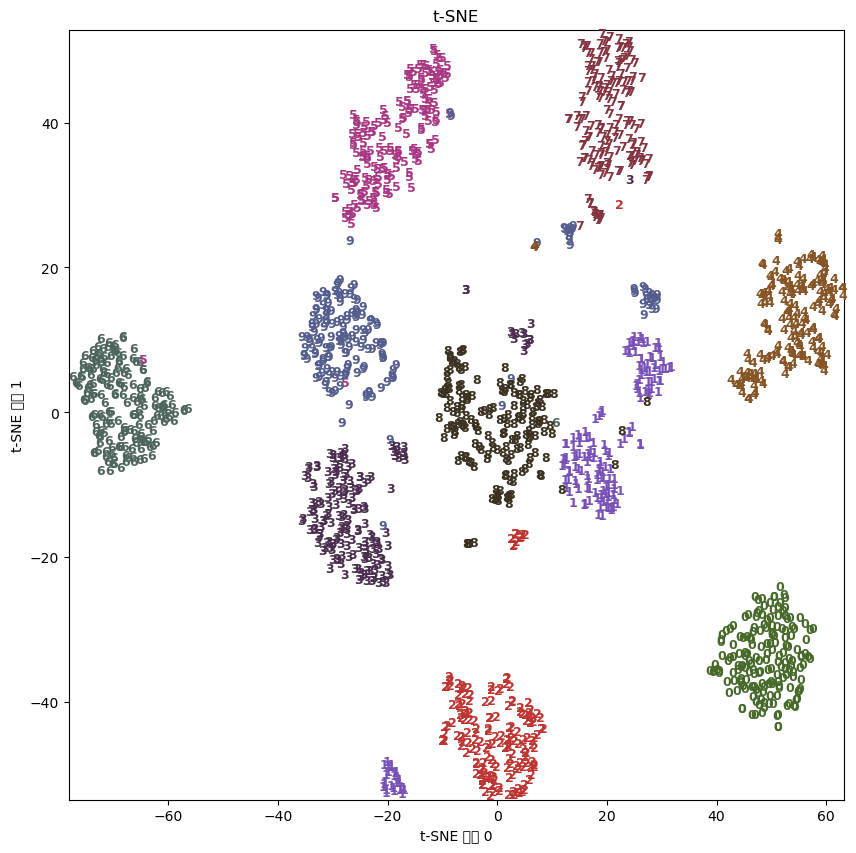

In [109]:
# t-SNE

digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max()+1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0], digits_tsne[i,1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict = {'weight':'bold','size':9})
plt.xlabel("t-SNE 특성 0")
plt.ylabel("t-SNE 특성 1")
plt.title("t-SNE")

# LLE

In [188]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)



LocallyLinearEmbedding(n_neighbors=10, random_state=42)

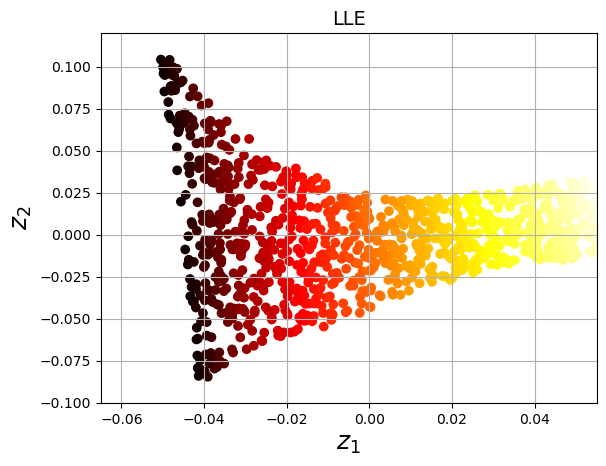

In [189]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
lle.fit(X)

X_reduced = lle.transform(X)

plt.title("LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()

c:\Users\AY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\AY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\AY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\AY\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


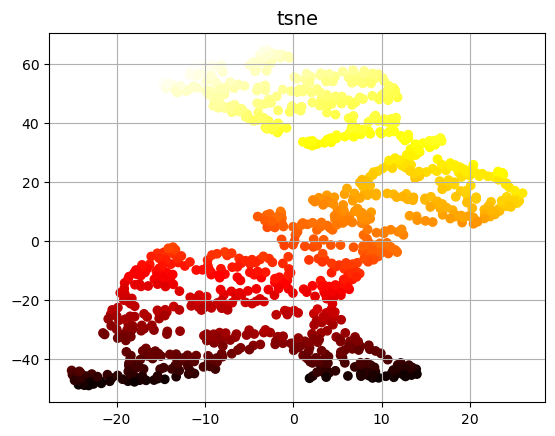

In [191]:
tsne = TSNE(n_components=2)
tsne.fit(X)
tsne_swiss = tsne.fit_transform(X)

plt.title("tsne", fontsize=14)
plt.scatter(tsne_swiss[:, 0], tsne_swiss[:, 1], c=t, cmap=plt.cm.hot)
plt.grid(True)

plt.show()

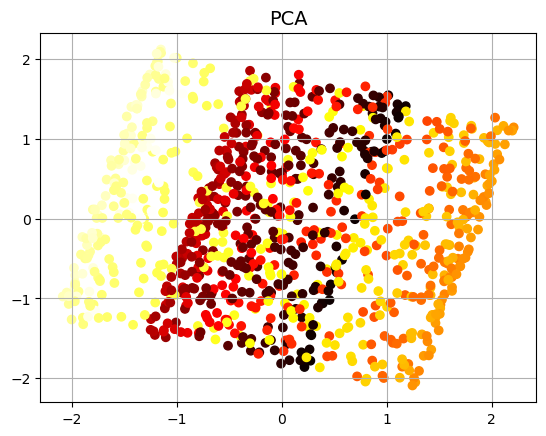

In [192]:
scaler = StandardScaler()
scaler.fit(X)
X_scale = scaler.transform(X)
pca = PCA(n_components=2)
pca_swiss = pca.fit_transform(X_scale)

plt.title("PCA", fontsize=14)
plt.scatter(pca_swiss[:, 0], pca_swiss[:, 1], c=t, cmap=plt.cm.hot)
plt.grid(True)

plt.show()